In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#class 1
x1 = np.random.normal(25,5,1000) #25 ortalamaya, 5sigmaya sahip bir değer üretir.
y1 = np.random.normal(25,5,1000)#datanın %66'sı 30(25+5) ile 20(25-5) değerleri arasında olur.
#bu dağılım gaussian(normal) dağılımdır.

#class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

#class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

In [3]:
x = np.concatenate((x1,x2,x3),axis=0) #axis=0 sütunu birleştirir.
y = np.concatenate((y1,y2,y3),axis=0) #x1,x2,x3 featureleri x exseninde; y1,y2,y3 featureleri y eskseninde birleştirilir.

In [4]:
dictionary = {"x":x, "y":y} #dictonary oluşturulur.

In [5]:
data = pd.DataFrame(dictionary) #dataframe'e dönüştürülür.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 46.9 KB


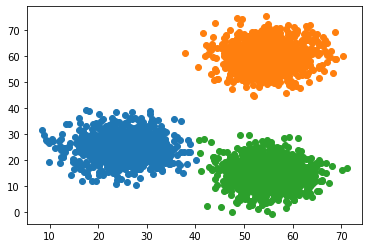

In [7]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

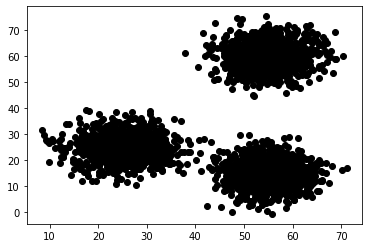

In [8]:
#k-means algoritması bu şekilde görür.
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show()

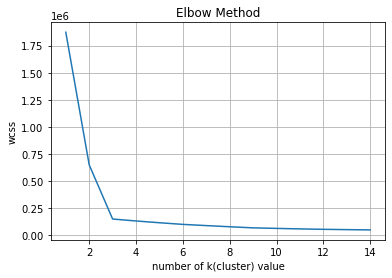

In [9]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k) #for döngüsünün içerisinde sırayla k değerleri denenir.
    kmeans.fit(data) #data k değerlerine göre fit edilir/model oluşturulur.
    wcss.append(kmeans.inertia_) #her bir k değeri için wcss değeri bulunur.
    
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k(cluster) value")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.grid()
plt.show()

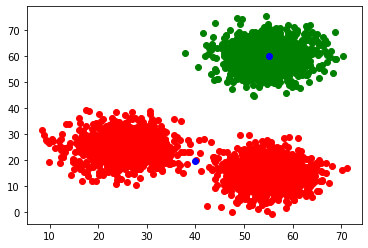

In [13]:
#k=2 için model
kmeans2 = KMeans(n_clusters=2)
clusters = kmeans2.fit_predict(data) #fit_predict methodu ile data fit edilip, fit edilen datadan 2 cluster oluşturulabilir.

data["label"] = clusters

plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red") #cluster1
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green")#cluster2
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="blue")#centroid
plt.show()

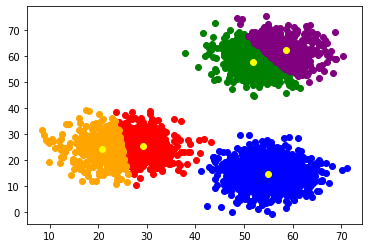

In [14]:
#k=5 için model
kmeans2 = KMeans(n_clusters=5)
clusters = kmeans2.fit_predict(data)

data["label"]= clusters

plt.scatter(data.x[data.label == 0],data.y[data.label==0],color="red")
plt.scatter(data.x[data.label == 1],data.y[data.label==1],color="green")
plt.scatter(data.x[data.label == 2],data.y[data.label==2],color="blue")
plt.scatter(data.x[data.label == 3],data.y[data.label==3],color="orange")
plt.scatter(data.x[data.label == 4],data.y[data.label==4],color="purple")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()